In [1]:
import os
from lib.train_AI_lib import *

In [2]:
os.chdir('..')  # Setting current directory to root of repo
print(os.getcwd())

c:\Users\kevin\Documents\GitHub\APS360-2020Summer-Project


Epoch 0 | Time Taken: 5.18s | Training Error: 0.9861212564, Training loss: 47.6139407536 | Validation Error: 1.0000000000, Validation loss: 47.3591150981
Epoch 1 | Time Taken: 2.31s | Training Error: 0.9930606282, Training loss: 36.3659563269 | Validation Error: 0.9941520468, Validation loss: 23.2783149934
Epoch 2 | Time Taken: 2.26s | Training Error: 0.9857560263, Training loss: 21.6041246963 | Validation Error: 0.9853801170, Validation loss: 21.8824184082
Epoch 3 | Time Taken: 2.27s | Training Error: 0.9806428050, Training loss: 21.2363583969 | Validation Error: 0.9795321637, Validation loss: 22.0120794484
Epoch 4 | Time Taken: 2.23s | Training Error: 0.9850255661, Training loss: 21.1030160392 | Validation Error: 0.9912280702, Validation loss: 21.9677179636
Epoch 5 | Time Taken: 2.26s | Training Error: 0.9831994156, Training loss: 20.9089966498 | Validation Error: 0.9853801170, Validation loss: 21.7036919004
Epoch 6 | Time Taken: 2.28s | Training Error: 0.9846603360, Training loss: 2

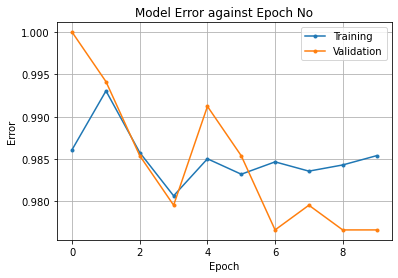

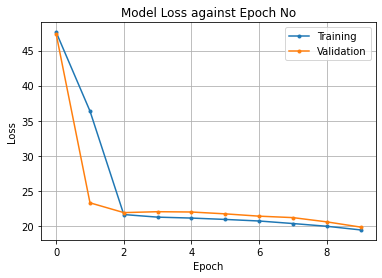

In [3]:
class exNetClass(nn.Module):
    def __init__(self, name):
        super(exNetClass, self).__init__()
        self.name = name

        self.conv1 = nn.Conv2d(3,   4,  4, stride=2)  # n = 1024 -> 510
        self.conv2 = nn.Conv2d(4,  5,  4, stride=2)  # n = 510  -> 255
        self.pool1 = nn.MaxPool2d(3, 2)                # n = 255  -> 127
        self.conv3 = nn.Conv2d(5,  5,  4, stride=2)  # n = 127  -> 62
        self.pool2 = nn.MaxPool2d(4, 2)                # n = 62   -> 30

        self.fc1   = nn.Linear(1*1*5, 10)
        self.fc2   = nn.Linear(10, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        #print(x.size())
        x = F.relu(self.conv2(x))
        #print(x.size())
        x = self.pool2(F.relu(self.conv3(x)))
        #print(x.size())
        x = x.view(-1, 1*1*5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return(x)

batchsize=64; lr=0.001; epochNo=10
trainLoader, valLoader, _ = loadData(batchsize, inPath="saved/0.1_resolution", mode='default')
net = exNetClass("netA"); net.cuda()
netATrain = trainNet(net, [trainLoader, valLoader], batchsize, epochNo, lr, cuda=1)